# Projeto de Análise de Dados - Notas do Enem 2021 de Pernambuco

### Disciplina: Tópicos Avançados em Gerencimento de Dados e Informações
### Alunos: Maria Teresa e Victor Amarante


Este projeto de ciência de dados visa entender um pouco mais sobre o comportamento das notas dos vestibulandos do estado de Pernambuco no ano de 2021. A base de dados é pública e foi divulgada no site do Inep. Mais informações sobre a base de dados no link abaixo.

> [Microdados do Enem 2021](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem)

## Modelos de Regressão

> O objetivo dessa segunda parte do projeto é fazer com que a máquina acerte a nota final no vestibular baseada nas informações dos vestibulandos.

## Load libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

## Load dataset

In [2]:
df = pd.read_csv('df_enem.csv', sep=';', encoding='iso-8859-1')

## View data

In [3]:
df

,Unnamed: 0,FAIXA ETÁRIA,SEXO,COR/RAÇA,SITUAÇÃO DE CONCLUSÃO,TIPO DE ESCOLA,LOCALIZAÇÃO DA ESCOLA,mun,NO_MUNICIPIO_PROVA,IDIOMA,...,NOTA_CH,NOTA_LC,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,NOTAS,PRESENCA
0,0,18 anos,M,Preta,Estou cursando e concluirei o EM em 2021,Público,Urbana,2604106,Caruaru,Inglês,...,524.7,456.4,120.0,120.0,120.0,140.0,140.0,640.0,564.96,4
1,1,18 anos,M,Branca,Estou cursando e concluirei o EM em 2021,Público,Não Consta,2602605,Brejo da Madre de Deus,Inglês,...,453.8,421.4,80.0,120.0,80.0,140.0,120.0,540.0,283.04,2
2,2,18 anos,F,Parda,Estou cursando e concluirei o EM em 2021,Público,Urbana,2612208,Salgueiro,Espanhol,...,498.3,459.2,120.0,120.0,120.0,120.0,20.0,500.0,494.80,4
3,3,19 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,2604106,Caruaru,Espanhol,...,480.8,458.0,120.0,120.0,120.0,120.0,100.0,580.0,478.34,4
4,4,Entre 31 e 35 anos,F,Branca,Já concluí o EM,Não respondeu,Não Consta,2607901,Jaboatão dos Guararapes,Espanhol,...,595.1,541.9,120.0,120.0,120.0,120.0,60.0,540.0,535.18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,5033,18 anos,F,Branca,Já concluí o EM,Não respondeu,Não Consta,2604007,Carpina,Espanhol,...,531.6,580.1,140.0,180.0,160.0,160.0,160.0,800.0,562.14,4
5034,5034,22 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,2611606,Recife,Inglês,...,624.6,571.6,160.0,200.0,160.0,160.0,180.0,860.0,657.68,4
5035,5035,Entre 26 e 30 anos,F,Preta,Já concluí o EM,Não respondeu,Não Consta,2611606,Recife,Inglês,...,521.3,466.3,120.0,160.0,120.0,120.0,100.0,620.0,506.22,4
5036,5036,18 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,2614105,Sertânia,Espanhol,...,365.7,451.3,120.0,120.0,80.0,100.0,40.0,460.0,424.56,4


## Clean dataset

In [4]:
del df['Unnamed: 0']

In [5]:
df.head()

,FAIXA ETÁRIA,SEXO,COR/RAÇA,SITUAÇÃO DE CONCLUSÃO,TIPO DE ESCOLA,LOCALIZAÇÃO DA ESCOLA,mun,NO_MUNICIPIO_PROVA,IDIOMA,STATUS DA REDAÇÃO,...,NOTA_CH,NOTA_LC,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,NOTAS,PRESENCA
0,18 anos,M,Preta,Estou cursando e concluirei o EM em 2021,Público,Urbana,2604106,Caruaru,Inglês,Sem problemas,...,524.7,456.4,120.0,120.0,120.0,140.0,140.0,640.0,564.96,4
1,18 anos,M,Branca,Estou cursando e concluirei o EM em 2021,Público,Não Consta,2602605,Brejo da Madre de Deus,Inglês,Sem problemas,...,453.8,421.4,80.0,120.0,80.0,140.0,120.0,540.0,283.04,2
2,18 anos,F,Parda,Estou cursando e concluirei o EM em 2021,Público,Urbana,2612208,Salgueiro,Espanhol,Sem problemas,...,498.3,459.2,120.0,120.0,120.0,120.0,20.0,500.0,494.80,4
3,19 anos,F,Parda,Já concluí o EM,Não respondeu,Não Consta,2604106,Caruaru,Espanhol,Sem problemas,...,480.8,458.0,120.0,120.0,120.0,120.0,100.0,580.0,478.34,4
4,Entre 31 e 35 anos,F,Branca,Já concluí o EM,Não respondeu,Não Consta,2607901,Jaboatão dos Guararapes,Espanhol,Sem problemas,...,595.1,541.9,120.0,120.0,120.0,120.0,60.0,540.0,535.18,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5038 entries, 0 to 5037
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FAIXA ETÁRIA           5038 non-null   object 
 1   SEXO                   5038 non-null   object 
 2   COR/RAÇA               5038 non-null   object 
 3   SITUAÇÃO DE CONCLUSÃO  5038 non-null   object 
 4   TIPO DE ESCOLA         5038 non-null   object 
 5   LOCALIZAÇÃO DA ESCOLA  5038 non-null   object 
 6   mun                    5038 non-null   int64  
 7   NO_MUNICIPIO_PROVA     5038 non-null   object 
 8   IDIOMA                 5038 non-null   object 
 9   STATUS DA REDAÇÃO      5038 non-null   object 
 10  RENDA                  5038 non-null   float64
 11  INTERNET               5038 non-null   object 
 12  NOTA_CN                5038 non-null   float64
 13  NOTA_MT                5038 non-null   float64
 14  NOTA_CH                5038 non-null   float64
 15  NOTA

In [7]:
df['FAIXA ETÁRIA'] = df['FAIXA ETÁRIA'].astype('category')
df['SEXO'] = df['SEXO'].astype('category')
df['COR/RAÇA'] = df['COR/RAÇA'].astype('category')
df['SITUAÇÃO DE CONCLUSÃO'] = df['SITUAÇÃO DE CONCLUSÃO'].astype('category')
df['TIPO DE ESCOLA'] = df['TIPO DE ESCOLA'].astype('category')
df['LOCALIZAÇÃO DA ESCOLA'] = df['LOCALIZAÇÃO DA ESCOLA'].astype('category')
df['NO_MUNICIPIO_PROVA'] = df['NO_MUNICIPIO_PROVA'].astype('category')
df['IDIOMA'] = df['IDIOMA'].astype('category')
df['STATUS DA REDAÇÃO'] = df['STATUS DA REDAÇÃO'].astype('category')
df['INTERNET'] = df['INTERNET'].astype('category')
df['RENDA'] = df['RENDA'].astype('category')

In [8]:
df.isnull().sum()

FAIXA ETÁRIA             0
SEXO                     0
COR/RAÇA                 0
SITUAÇÃO DE CONCLUSÃO    0
TIPO DE ESCOLA           0
LOCALIZAÇÃO DA ESCOLA    0
mun                      0
NO_MUNICIPIO_PROVA       0
IDIOMA                   0
STATUS DA REDAÇÃO        0
RENDA                    0
INTERNET                 0
NOTA_CN                  0
NOTA_MT                  0
NOTA_CH                  0
NOTA_LC                  0
NOTA_COMP1               0
NOTA_COMP2               0
NOTA_COMP3               0
NOTA_COMP4               0
NOTA_COMP5               0
NOTA_REDACAO             0
NOTAS                    0
PRESENCA                 0
dtype: int64

## EDA

In [9]:
df.describe()

,mun,NOTA_CN,NOTA_MT,NOTA_CH,NOTA_LC,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,NOTAS,PRESENCA
count,5.038000e+03,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.00000,5038.000000,5038.000000
mean,2.608821e+06,482.295508,524.468547,508.989831,492.442692,117.648698,139.869481,115.462530,128.174815,115.418596,616.57412,515.616554,3.906312
std,4.073599e+03,77.230596,107.256564,96.021467,78.897466,34.539284,46.483088,37.321705,39.929524,59.494668,193.76855,103.612505,0.431944
min,2.600054e+06,0.000000,354.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,66.020000,2.000000
25%,2.605707e+06,424.325000,438.125000,435.700000,438.325000,100.000000,120.000000,100.000000,120.000000,80.000000,520.00000,455.800000,4.000000
50%,2.610608e+06,470.650000,500.350000,506.750000,495.100000,120.000000,120.000000,120.000000,120.000000,120.000000,600.00000,513.510000,4.000000
75%,2.611606e+06,531.575000,596.900000,577.675000,546.350000,140.000000,180.000000,140.000000,160.000000,160.000000,740.00000,581.195000,4.000000
max,2.616407e+06,778.600000,953.100000,832.500000,740.300000,200.000000,200.000000,200.000000,200.000000,200.000000,980.00000,833.440000,6.000000


### Quantitative variables

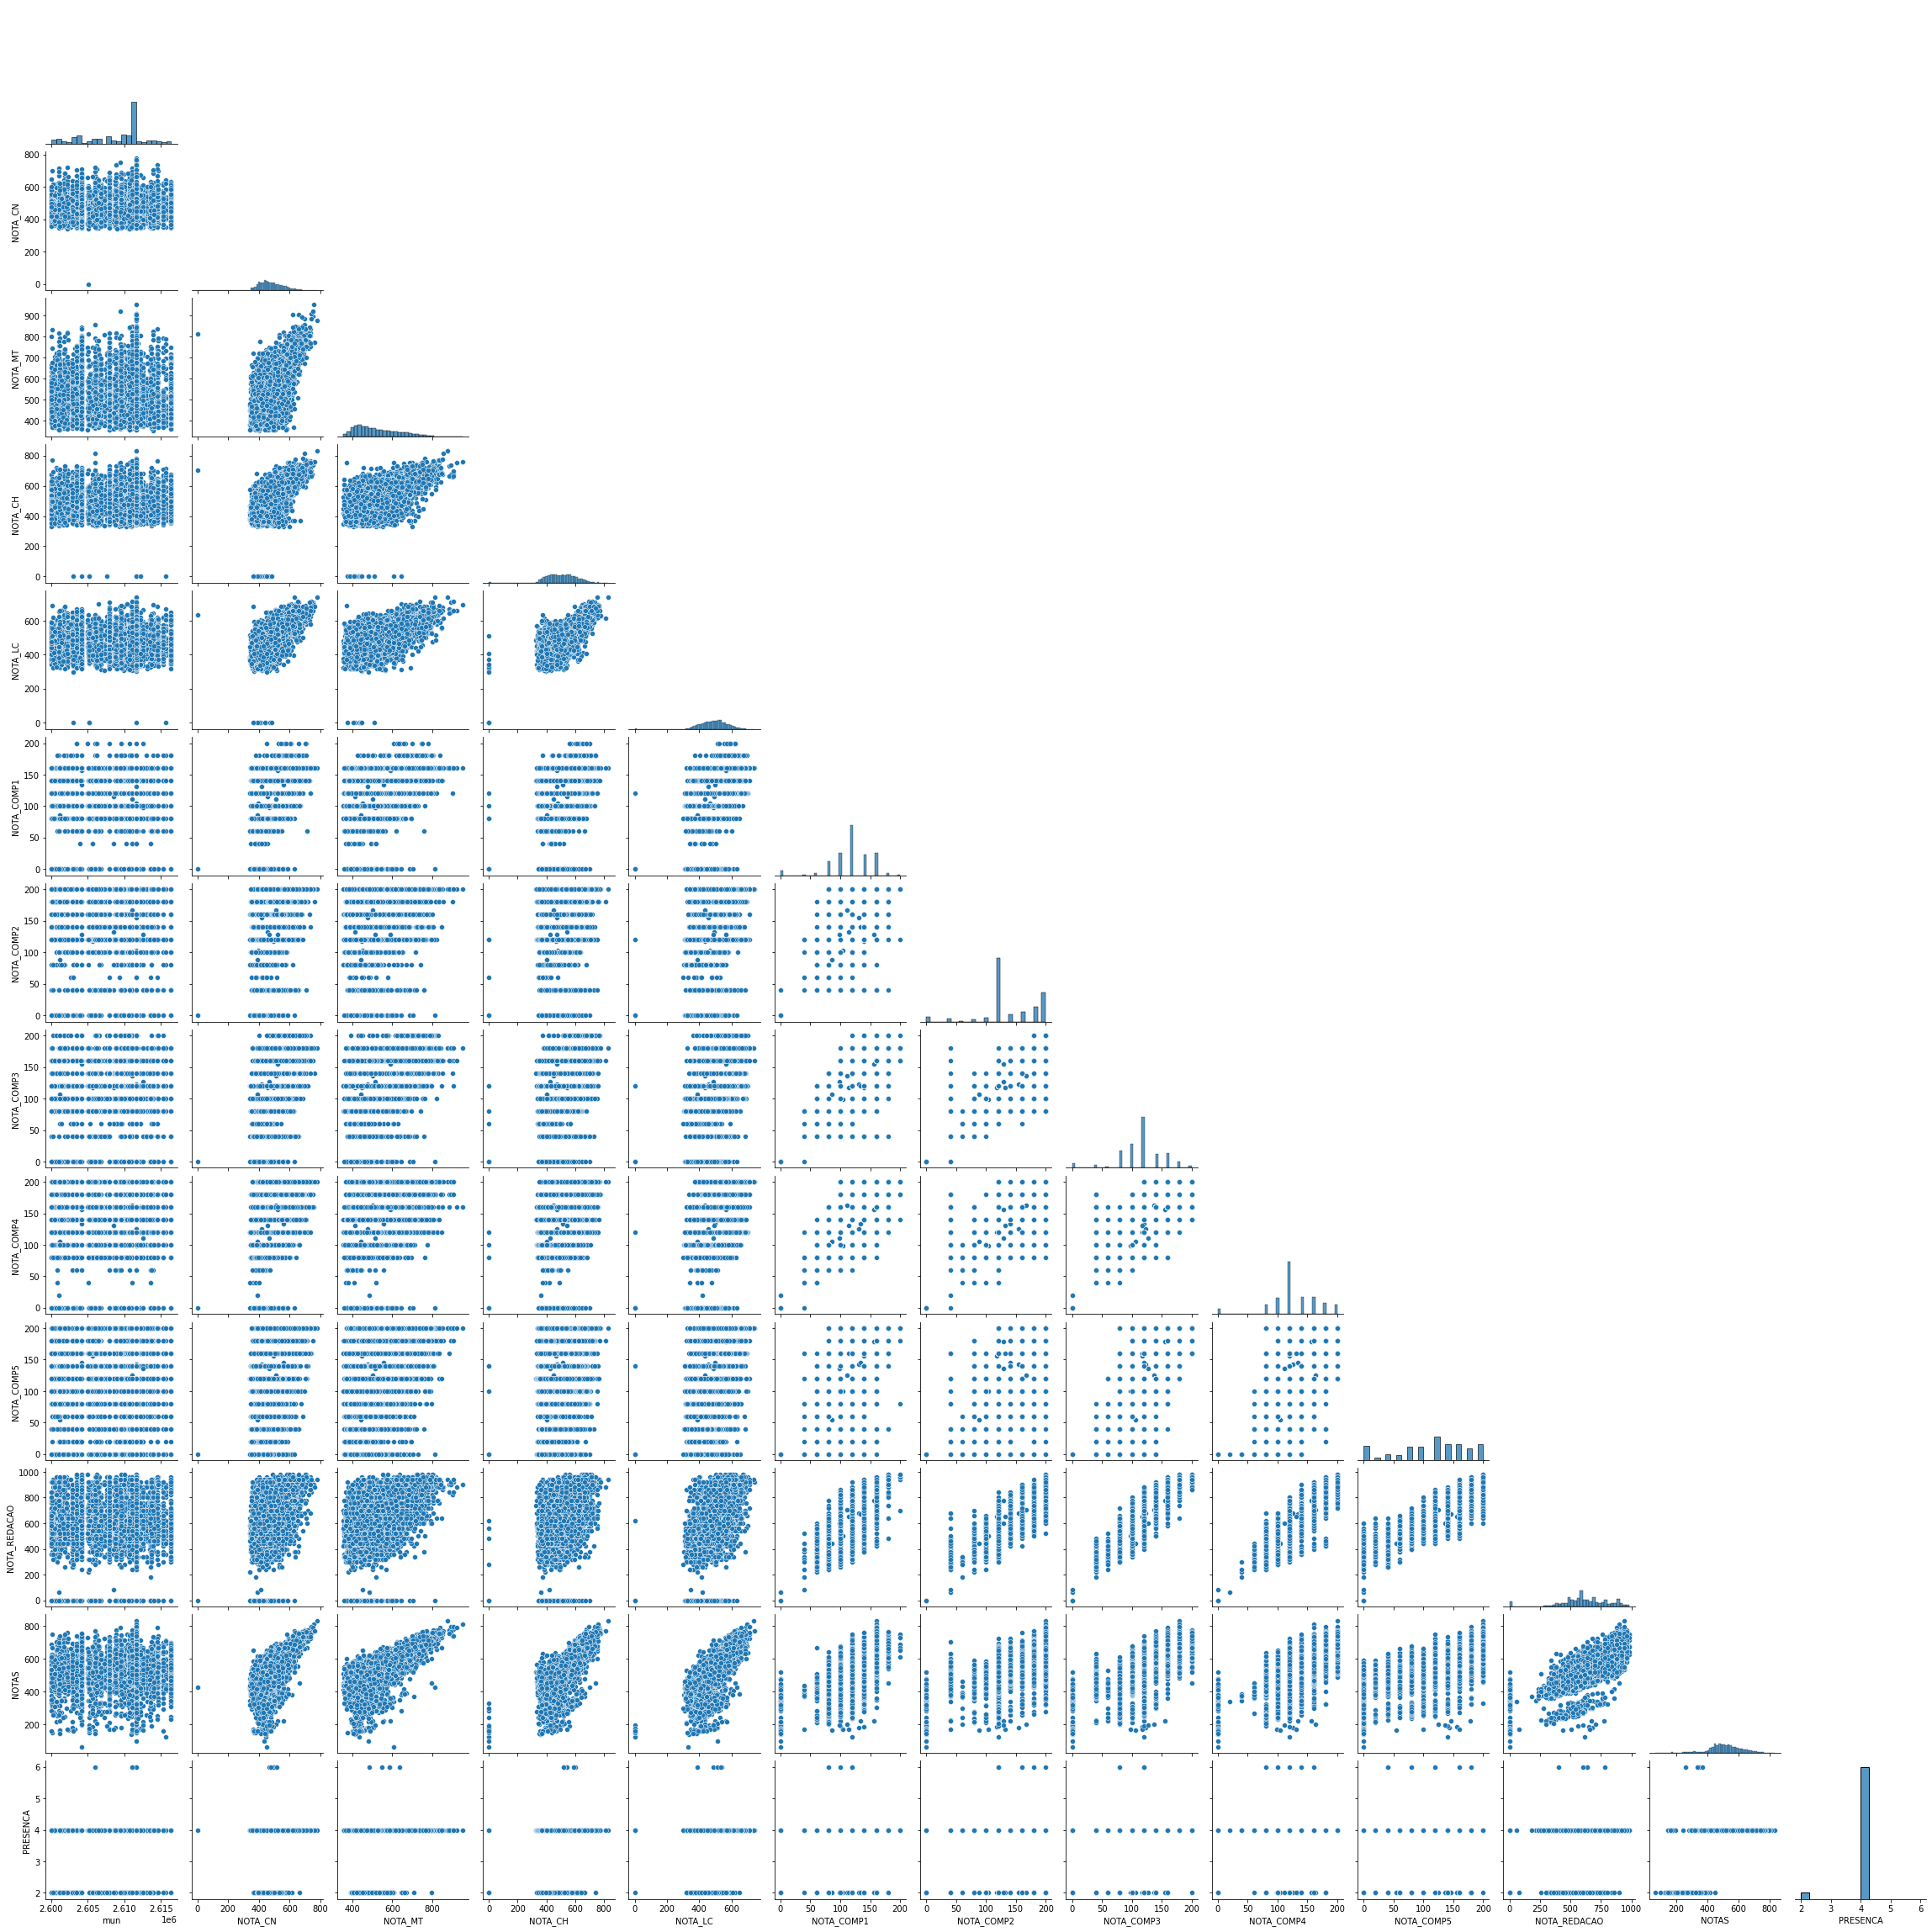

In [10]:
sns.pairplot(df, corner=True);

### Qualitative variables

In [11]:
df["FAIXA ETÁRIA"].value_counts().head()

18 anos               1398
17 anos                998
19 anos                734
20 anos                450
Entre 26 e 30 anos     266
Name: FAIXA ETÁRIA, dtype: int64

In [12]:
df["SEXO"].value_counts()

F    3084
M    1954
Name: SEXO, dtype: int64

In [13]:
df["COR/RAÇA"].value_counts()

Parda            2466
Branca           1687
Preta             580
Não declarado     114
Amarela           110
Indígena           81
Name: COR/RAÇA, dtype: int64

In [14]:
df["SITUAÇÃO DE CONCLUSÃO"].value_counts()

Já concluí o EM                             2806
Estou cursando e concluirei o EM em 2021    2216
Não concluí e não estou cursando o EM         16
Name: SITUAÇÃO DE CONCLUSÃO, dtype: int64

In [15]:
df["TIPO DE ESCOLA"].value_counts()

Não respondeu    2822
Público          1825
Privada           391
Name: TIPO DE ESCOLA, dtype: int64

In [16]:
df["LOCALIZAÇÃO DA ESCOLA"].value_counts()

Não Consta    3556
Urbana        1427
Rural           55
Name: LOCALIZAÇÃO DA ESCOLA, dtype: int64

In [17]:
df["NO_MUNICIPIO_PROVA"].value_counts().head()

Recife                     1186
Petrolina                   311
Jaboatão dos Guararapes     250
Caruaru                     219
Paulista                    198
Name: NO_MUNICIPIO_PROVA, dtype: int64

In [18]:
df["IDIOMA"].value_counts()

Inglês      2683
Espanhol    2355
Name: IDIOMA, dtype: int64

In [19]:
df["STATUS DA REDAÇÃO"].value_counts()

Sem problemas                      4849
Em Branco                            79
Fuga ao tema                         58
Cópia Texto Motivador                17
Texto insuficiente                   12
Não Consta                            9
Parte desconectada                    7
Anulada                               5
Não atendimento ao tipo textual       2
Name: STATUS DA REDAÇÃO, dtype: int64

In [20]:
df["RENDA"].value_counts().head()

0.5    2032
1.0     818
1.5     504
0.0     496
2.5     242
Name: RENDA, dtype: int64

In [21]:
df.corr()['NOTAS'].sort_values(ascending=False)

NOTAS           1.000000
NOTA_REDACAO    0.767133
NOTA_CH         0.738864
NOTA_LC         0.734396
NOTA_MT         0.715134
NOTA_CN         0.702553
NOTA_COMP3      0.701513
NOTA_COMP4      0.698634
NOTA_COMP1      0.685928
NOTA_COMP5      0.671039
NOTA_COMP2      0.665915
PRESENCA        0.519404
mun             0.048397
Name: NOTAS, dtype: float64

In [22]:
df['FAIXA ETÁRIA'] = df['FAIXA ETÁRIA'].cat.codes
df['SEXO'] = df['SEXO'].cat.codes
df['COR/RAÇA'] = df['COR/RAÇA'].cat.codes
df['SITUAÇÃO DE CONCLUSÃO'] = df['SITUAÇÃO DE CONCLUSÃO'].cat.codes
df['TIPO DE ESCOLA'] = df['TIPO DE ESCOLA'].cat.codes
df['LOCALIZAÇÃO DA ESCOLA'] = df['LOCALIZAÇÃO DA ESCOLA'].cat.codes
df['NO_MUNICIPIO_PROVA'] = df['NO_MUNICIPIO_PROVA'].cat.codes
df['IDIOMA'] = df['IDIOMA'].cat.codes
df['STATUS DA REDAÇÃO'] = df['STATUS DA REDAÇÃO'].cat.codes
df['INTERNET'] = df['INTERNET'].cat.codes
df['RENDA'] = df['RENDA'].cat.codes

In [23]:
df.head()

,FAIXA ETÁRIA,SEXO,COR/RAÇA,SITUAÇÃO DE CONCLUSÃO,TIPO DE ESCOLA,LOCALIZAÇÃO DA ESCOLA,mun,NO_MUNICIPIO_PROVA,IDIOMA,STATUS DA REDAÇÃO,...,NOTA_CH,NOTA_LC,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,NOTAS,PRESENCA
0,1,1,5,0,2,2,2604106,26,1,7,...,524.7,456.4,120.0,120.0,120.0,140.0,140.0,640.0,564.96,4
1,1,1,1,0,2,0,2602605,17,1,7,...,453.8,421.4,80.0,120.0,80.0,140.0,120.0,540.0,283.04,2
2,1,0,4,0,2,2,2612208,66,0,7,...,498.3,459.2,120.0,120.0,120.0,120.0,20.0,500.0,494.80,4
3,2,0,4,1,0,0,2604106,26,0,7,...,480.8,458.0,120.0,120.0,120.0,120.0,100.0,580.0,478.34,4
4,10,0,1,1,0,0,2607901,42,0,7,...,595.1,541.9,120.0,120.0,120.0,120.0,60.0,540.0,535.18,4


In [24]:
df = df.drop(['TIPO DE ESCOLA','LOCALIZAÇÃO DA ESCOLA', 'mun', 'NO_MUNICIPIO_PROVA','STATUS DA REDAÇÃO','INTERNET','PRESENCA'], axis = 1)

In [25]:
df

,FAIXA ETÁRIA,SEXO,COR/RAÇA,SITUAÇÃO DE CONCLUSÃO,IDIOMA,RENDA,NOTA_CN,NOTA_MT,NOTA_CH,NOTA_LC,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,NOTAS
0,1,1,5,0,1,1,554.200000,649.500000,524.7,456.4,120.0,120.0,120.0,140.0,140.0,640.0,564.96
1,1,1,1,0,1,1,405.269967,482.724891,453.8,421.4,80.0,120.0,80.0,140.0,120.0,540.0,283.04
2,1,0,4,0,0,3,410.500000,606.000000,498.3,459.2,120.0,120.0,120.0,120.0,20.0,500.0,494.80
3,2,0,4,1,0,6,400.900000,472.000000,480.8,458.0,120.0,120.0,120.0,120.0,100.0,580.0,478.34
4,10,0,1,1,0,3,552.000000,446.900000,595.1,541.9,120.0,120.0,120.0,120.0,60.0,540.0,535.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,1,0,1,1,0,4,473.600000,425.400000,531.6,580.1,140.0,180.0,160.0,160.0,160.0,800.0,562.14
5034,5,0,4,1,1,6,618.500000,613.700000,624.6,571.6,160.0,200.0,160.0,160.0,180.0,860.0,657.68
5035,9,0,5,1,1,2,449.200000,474.300000,521.3,466.3,120.0,160.0,120.0,120.0,100.0,620.0,506.22
5036,1,0,4,1,0,1,428.400000,417.400000,365.7,451.3,120.0,120.0,80.0,100.0,40.0,460.0,424.56


In [49]:
df.to_csv('df_final.csv', sep=';', encoding='iso-8859-1')

## Separação das variáveis

In [26]:
y = df.NOTAS
x = df.loc[:, df.columns != 'NOTAS']

## Separação de treino, teste e validação

- Split a base de dados em 2 grupos:
    - 70% dos dados para treino
    - 30% dos dados para teste
        - O grupo de validação será feito automaticamente quando aplicarmos o Cross-Validation (Validação Cruzada). Estaremos iterando entre dados de treino e dados de validação de forma a avaliar o desempenho do modelo de machine learning e que escolher aquele que melhor performar.

In [27]:
# divisao dos dados em train set e test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

## Regressão Linear

In [28]:
from sklearn.linear_model import LinearRegression

reglin = LinearRegression()
reglin.fit(x_train, y_train)

prediction_reglin = reglin.predict(x_train)

In [29]:
r2_reglin = r2_score(y_train, prediction_reglin)
mse_reglin = mean_squared_error(y_train, prediction_reglin)
mape_reglin = mean_absolute_percentage_error(y_train, prediction_reglin)

In [30]:
print(f'R2 score ----------------------> {r2_reglin}')
print(f'Mean Squared Error ------------> {np.sqrt(mse_reglin)}')
print(f'Mean Absolute Percentage Erros -> {mape_reglin}')

R2 score ----------------------> 0.8430750555613287
Mean Squared Error ------------> 41.20509533708614
Mean Absolute Percentage Erros -> 0.054206370391066995


## Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

prediction_dtr = dtr.predict(x_train)

In [32]:
r2_dtr = r2_score(y_train, prediction_dtr)
mse_dtr = mean_squared_error(y_train, prediction_dtr)
mape_dtr = mean_absolute_percentage_error(y_train, prediction_dtr)

In [33]:
print(f'R2 score ----------------------> {r2_dtr}')
print(f'Mean Squared Error ------------> {np.sqrt(mse_dtr)}')
print(f'Mean Absolute Percentage Erros -> {mape_dtr}')

R2 score ----------------------> 1.0
Mean Squared Error ------------> 0.0
Mean Absolute Percentage Erros -> 0.0


## Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

prediction_rf = rf_reg.predict(x_train)

In [35]:
r2_rf = r2_score(y_train, prediction_rf)
mse_rf = mean_squared_error(y_train, prediction_rf)
mape_rf = mean_absolute_percentage_error(y_train, prediction_rf)

In [36]:
print(f'R2 score ----------------------> {r2_rf}')
print(f'Mean Squared Error ------------> {np.sqrt(mse_rf)}')
print(f'Mean Absolute Percentage Erros -> {mape_rf}')

R2 score ----------------------> 0.9755211101088022
Mean Squared Error ------------> 16.274242795425494
Mean Absolute Percentage Erros -> 0.02193426994860497


## Support Vector Regression (SVM Library)

In [37]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)

prediction_svr = svr.predict(x_train)

In [38]:
r2_svr = r2_score(y_train, prediction_svr)
mse_svr = mean_squared_error(y_train, prediction_svr)
mape_svr = mean_absolute_percentage_error(y_train, prediction_svr)

In [39]:
print(f'R2 score ----------------------> {r2_svr}')
print(f'Mean Squared Error ------------> {np.sqrt(mse_svr)}')
print(f'Mean Absolute Percentage Erros -> {mape_svr}')

R2 score ----------------------> 0.7933255505759135
Mean Squared Error ------------> 47.287714709011844
Mean Absolute Percentage Erros -> 0.05273568620949559


## Avaliação com o Cross Validation

> É uma técnica muito utilizada para avaliação do desempenho de modelos de machine learning. O método do CV consiste em particionar os dados em conjuntos (partes), onde um conjunto é utilizado para treino e outro conjunto é utilizado para validação e avaliação do desempenho do modelo.

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
# definindo uma funcao para printar os resultados do cross validation
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation', scores.std())

### LinearRegression

In [42]:
scores_reglin = cross_val_score(reglin,
                        x_train, y_train,
                        scoring= 'neg_mean_squared_error',
                        cv=10)
reglin_scores = np.sqrt(-scores_reglin)

### DecisionTreeRegression

In [43]:
scores_dtr = cross_val_score(dtr,
                        x_train, y_train,
                        scoring='neg_mean_squared_error',
                        cv=10)
dtr_scores = np.sqrt(-scores_dtr)

### RandomForestRegression

In [44]:
scores_rf_reg = cross_val_score(rf_reg,
                        x_train, y_train,
                        scoring='neg_mean_squared_error',
                        cv=10)
rf_scores = np.sqrt(-scores_rf_reg)

### SVR

In [45]:
scores_svr = cross_val_score(svr,
                        x_train, y_train,
                        scoring='neg_mean_squared_error',
                        cv=10)
svr_scores = np.sqrt(-scores_svr)

### Resultados

In [46]:
print('LINEAR REGRESSION')
display_scores(reglin_scores)
print('\n')
print('DECISION TREE REGRESSOR')
display_scores(dtr_scores)
print('\n')
print('RANDOM FOREST REGRESSOR')
display_scores(rf_scores)
print('\n')
print('SVR')
display_scores(svr_scores)

LINEAR REGRESSION
Scores: [25.62717627 31.91791067 41.2274466  46.90704055 42.32300989 41.39045456
 39.17443951 43.10261846 47.03341792 49.82562569]
Mean: 40.85291401393835
Standard deviation 6.910042396934769


DECISION TREE REGRESSOR
Scores: [53.10901027 57.31800992 63.46459366 69.19684173 60.11127316 55.92879159
 61.82324192 62.24305289 59.46874145 66.07457255]
Mean: 60.87381291431275
Standard deviation 4.53601048695038


RANDOM FOREST REGRESSOR
Scores: [29.48390975 34.72944035 42.67723259 50.12815894 43.08046058 41.58780993
 42.73991395 45.58291624 46.96108251 50.99296791]
Mean: 42.79638927466192
Standard deviation 6.24423473702034


SVR
Scores: [31.08637317 34.86187407 49.45443966 50.37981528 47.96466092 47.0734719
 46.95287843 52.12361472 53.014368   56.55557267]
Mean: 46.94670688170975
Standard deviation 7.567482093147631


> Podemos observar que houveram dois dos modelos com problema de overfitting, são eles: **Decision Tree Regressor** e **Random Forest Regressor**. Tanto os modelos Linear Regression quanto SVR, apresentam resultados satisfatórios, entretanto, o modelo de regressão linear apresentou o menor erro médio quadrático. Com isso, o melhor modelo que foi avaliado é o modelo de Regressão Linear, apresentando a menor média de erro após a validação cruzada. Portanto, esse será o modelo escolhido para prosseguir com o projeto.

## MlFlow

In [50]:
import os
import warnings
import sys
from sklearn.linear_model import ElasticNet
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)


def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2


if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    np.random.seed(40)

    try:
        data = pd.read_csv('df_final.csv', sep=";", encoding='iso-8859-1')
    except Exception as e:
        logger.exception(
            "Unable to download training & test CSV, check your internet connection. Error: %s", e
        )

    # Split the data into training and test sets. (0.75, 0.25) split.
    train, test = train_test_split(data)

    # The predicted column is "NOTAS"
    train_x = train.drop(["NOTAS"], axis=1)
    test_x = test.drop(["NOTAS"], axis=1)
    train_y = train[["NOTAS"]]
    test_y = test[["NOTAS"]]

    alpha = 1 #float(sys.argv[1]) if len(sys.argv) > 1 else 0.5
    l1_ratio = 1 #float(sys.argv[2]) if len(sys.argv) > 2 else 0.5

    with mlflow.start_run():
        lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        lr.fit(train_x, train_y)

        predicted_notas = lr.predict(test_x)

        (rmse, mae, r2) = eval_metrics(test_y, predicted_notas)

        print("Elasticnet model (alpha=%f, l1_ratio=%f):" % (alpha, l1_ratio))
        print("  RMSE: %s" % rmse)
        print("  MAE: %s" % mae)
        print("  R2: %s" % r2)

        mlflow.log_param("alpha", alpha)
        mlflow.log_param("l1_ratio", l1_ratio)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mae", mae)

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":

            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
            mlflow.sklearn.log_model(lr, "model", registered_model_name="ElasticnetGradesModel")
        else:
            mlflow.sklearn.log_model(lr, "model")

Elasticnet model (alpha=1.000000, l1_ratio=1.000000):
  RMSE: 41.782992311996125
  MAE: 17.336161007301467
  R2: 0.8344236847797405
